# This Project is currently in progress 

In [3]:
%matplotlib inline
import numpy as np 
import scipy 
import pandas as pd 
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix 
from matplotlib import pyplot as plt
import sklearn.metrics as metrics

In [4]:
#Dataframe
diabetes_df = pd.read_csv("diabetes.csv")

In [5]:
diabetes_df #printing the dataframe 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### Exploratory Data Analysis: Histogram

In [7]:
diabetes_values = diabetes_df[diabetes_df['Outcome'] == 1]
nondiabetes_values = diabetes_df[diabetes_df['Outcome'] == 0]

#print(nondiabetes_values.head) #uncomment if you want to see vals 
#print(diabetes_values.head) ##uncomment if you want to see vals 

In [8]:
def row_col(i):
    """
    This function simply mimics the series the row and col values follow. Together [row,col], they 
    help determine the subplot coordinates for the different feature histograms 
    """
    row = i//2 # The row vector follows - 0011223344 series 
    
    if i%2 > 0 :#The col vector follows - 0101010101 series 
        col = 1 
    else:
        col = 0 
    
    return row,col 

#REMOVE
# for i in range(7):
#     row,col = row_col(i)
#     print([row,col])



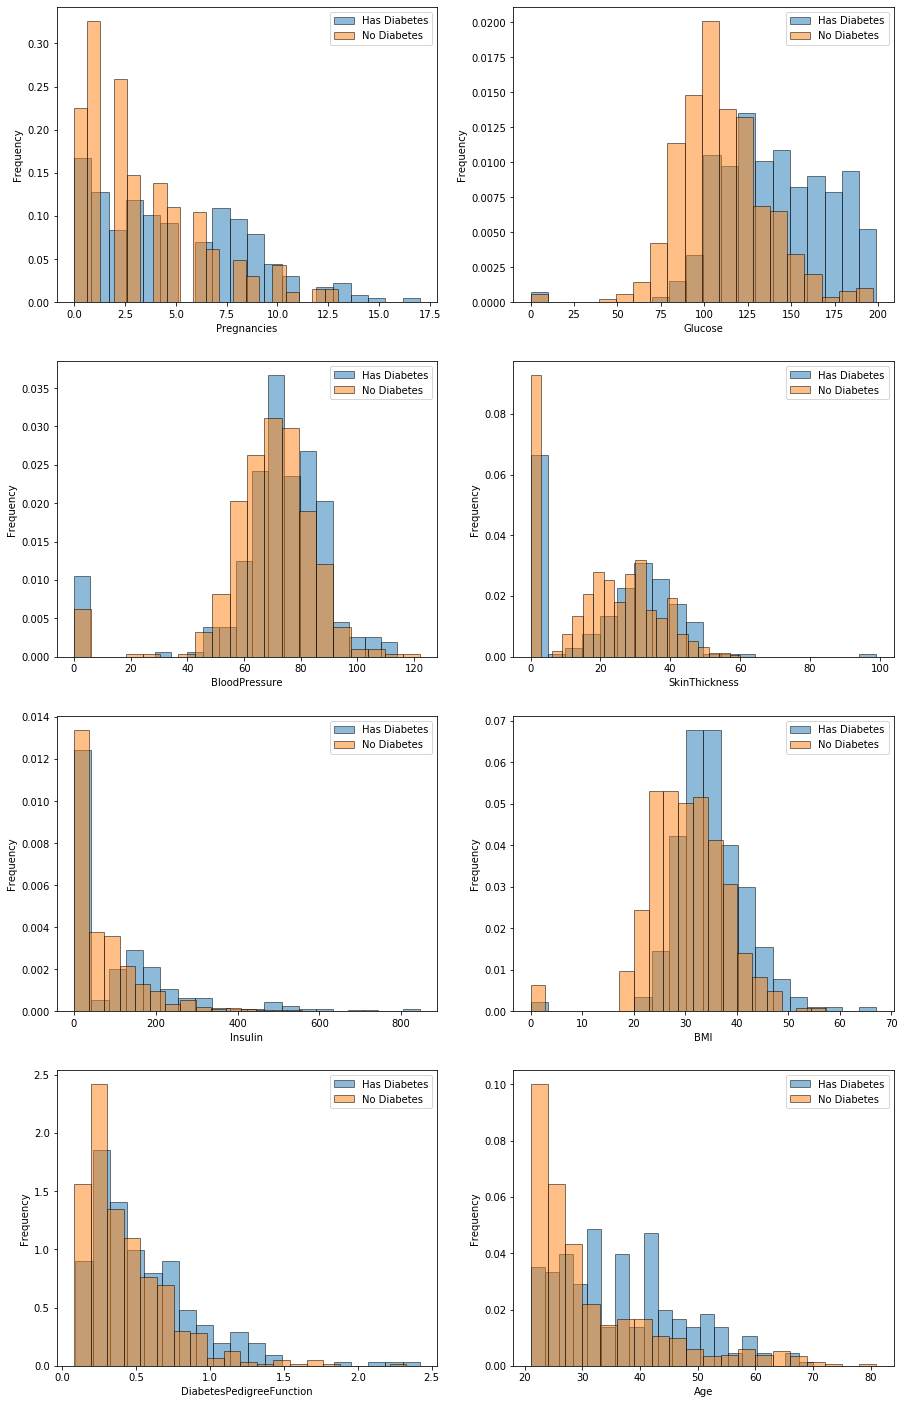

In [17]:
glucose_diab = diabetes_values.Glucose
glucose_nodiab = nondiabetes_values.Glucose


counter = 0
fig,ax = plt.subplots(4,2, figsize = (15, 25))
for i in diabetes_df.columns[0:-1]: #the -1 helps exclude the last column from the for loop
    #print(i)
    
    diab_series = diabetes_values[str(i)]
    nondiab_series = nondiabetes_values[str(i)]
    
    row,col = row_col(counter) #Function returns row and col coordinates, can be found in the cell above
    
    ax[row,col].hist(diab_series, alpha = 0.5, edgecolor = 'black', label = 'Has Diabetes', density = True, bins = 20)
    ax[row,col].hist(nondiab_series, alpha = 0.5, edgecolor = 'black', label = 'No Diabetes', density = True, bins = 20)
    
    ax[row,col].set_ylabel('Frequency')
    ax[row,col].set_xlabel(str(i))
    ax[row,col].legend() 
    
    counter += 1 #The counter is used to determine the row and col values since the for loop parses over a- 
                 # -list of strings 
    

    
    
    




## Interpretation of key features goes here 

.... (in progress)

In [16]:
diabetes_df.head

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
#seeing there are no missing values - we can move on to the second step of transforming data so scikit learn
#can interpret it

In [19]:
#setting the dependent and independent variables

y = diabetes_df['Outcome'].copy()
x = diabetes_df.iloc[:,:-1] #everything except the last column 

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y)#splits the data into training and testing data 

In [26]:
# These values should be equal 
test_ratio = len(x_test)/len(diabetes_df) #you can use y_test as the numerator as well
train_ratio = len(x_train)/len(diabetes_df) #you can use y_train as the numerator as well
print(f"The testing elements ratio = {test_ratio}") 
print(f"The training elements ratio = {train_ratio}") 

The testing elements ratio = 0.25
The training elements ratio = 0.75


In [28]:
primary_dec_tree = DecisionTreeClassifier()
primary_dec_tree = primary_dec_tree.fit(x_train,y_train)

In [ ]:
#DELETE CELL



If you are curious you can print this decision tree, however, it takes quite a bit of computation and time to load it. 

In [32]:
fig, ax = plt.subplots(figsize = (200,100))
plot_tree(primary_dec_tree,
          filled = True,
         rounded = True, 
         feature_names = x.columns)
#plt.savefig('firstpyDecTree.png')
plt.show()


### Confusion Matrix 

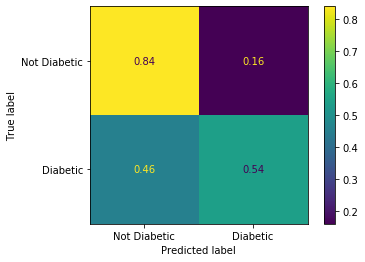

In [43]:
plot_confusion_matrix(primary_dec_tree, x_test, y_test, normalize = 'true', display_labels = [ 'Not Diabetic', 'Diabetic'])
plt.show()

This confusion matrix suggests that the current tree is accurate at predicting non diabetic individuals since it has a pretty high True Negative value of 95

In [35]:
accuracy = primary_dec_tree.score(x_test,y_test)
print(accuracy)

0.71875


In [37]:

predicted_vals = primary_dec_tree.predict(x_test)
y_test = np.array(y_test)
y_test.shape

(192,)

In [32]:
metrics.accuracy_score(y_test, predicted_vals)

0.640625

In [34]:
metrics.precision_score(y_test, predicted_vals)

0.5526315789473685

In [35]:
metrics.recall_score(y_test, predicted_vals)

0.5454545454545454

In [36]:
metrics.balanced_accuracy_score(y_test, predicted_vals)

0.6249011857707509

As you can see based on a 1.0 score, we think the tree might be overfit to the training data 

In [39]:
#Fascinating way to suggest that the Training error is 0% but the testing error is extremely high.

foolin_rnd = primary_dec_tree.predict(x_train)


1.0